In [1]:
import sys
print(sys.executable)
%pip install pandas
import pandas as pd
df= pd.read_csv('encoded-spam.csv')
df.sample(5)

/usr/local/bin/python3
Note: you may need to restart the kernel to use updated packages.


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5057,ham,"Geeeee ... Your internet is really bad today, ...",NaN,NaN,NaN
1357,ham,Good afternoon loverboy ! How goes you day ? A...,NaN,NaN,NaN
3286,ham,The gas station is like a block away from my h...,NaN,NaN,NaN
431,ham,Does she usually take fifteen fucking minutes ...,NaN,NaN,NaN
3967,ham,Did u turn on the heater? The heater was on an...,NaN,NaN,NaN


# DATA CLEANING

In [2]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
232,ham,"Sorry battery died, yeah I'm here"
2046,ham,"Aight fuck it, I'll get it later"
5549,ham,"You know, wot people wear. T shirts, jumpers, ..."
3255,ham,Who were those people ? Were you in a tour ? I...
4500,ham,So wat's da decision?


In [3]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3328,ham,Sac will score big hundred.he is set batsman:-)
5507,ham,I want to be inside you every night...
382,ham,Hey leave it. not a big deal:-) take care.
2130,ham,Later i guess. I needa do mcat study too.
2137,ham,Then why you came to hostel.


In [4]:
# %pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [5]:
df['target']=encoder.fit_transform(df['target'])

In [6]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Missing values
df.isnull().sum()   

target    0
text      0
dtype: int64

In [8]:
# Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [9]:
# Remove duplicates:
df=df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(5169, 2)

# EDA

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x11d26e050>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

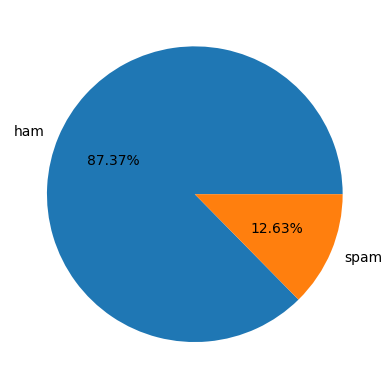

In [14]:
# %pip install matplotlib
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')    

# DATA IS IMBALANCED :( 

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/somenathsebait/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters']=df['text'].apply(len) #no.of chars used

In [17]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# fetching number of words 
df['text'].apply(lambda x: nltk.wordpunct_tokenize(x)) # breaking the senteces into lists of words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, don, ', t, think, he, goes, to, usf, ...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [19]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)) ) #counting the list elements of sentences

In [20]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['text'].apply(lambda x: nltk.sent_tokenize(x)) #installed punkt_tab manually

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [22]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# For ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# For spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_characters', ylabel='Count'>

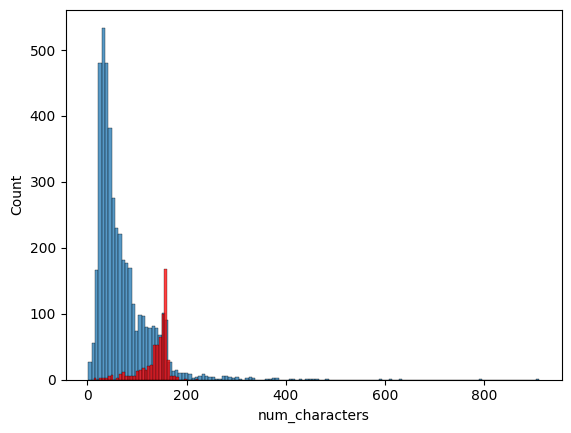

In [28]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

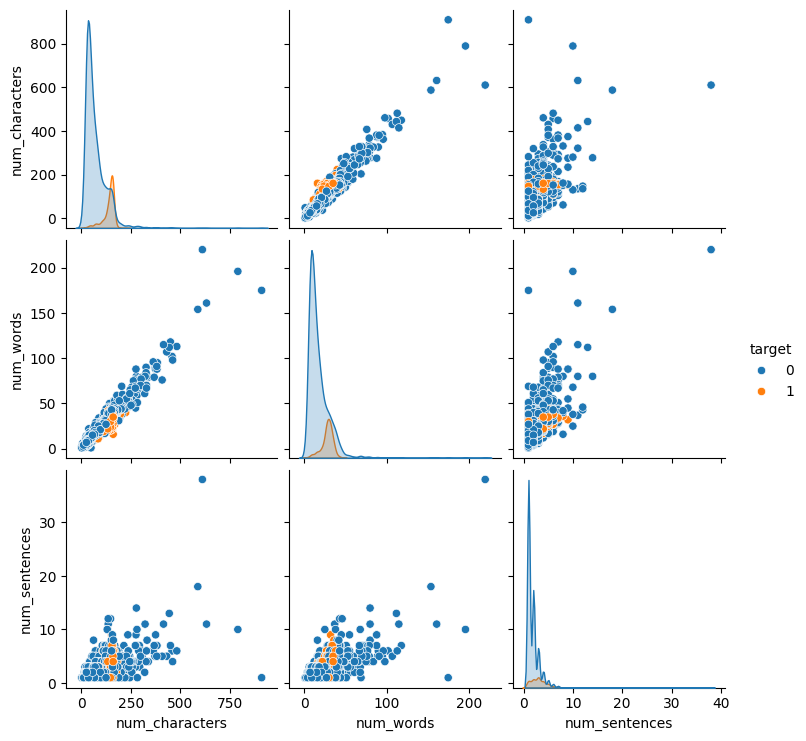

In [29]:
sns.pairplot(df,hue='target')

<Axes: >

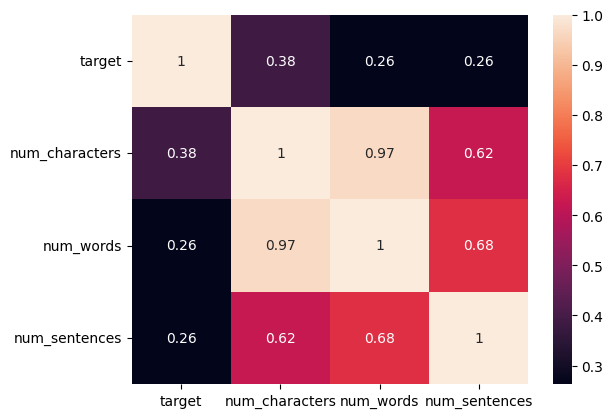

In [30]:
sns.heatmap(df.drop(columns=['text']).corr(), annot=True)

3. Data preprocessing
    . Lower case
    . Tokenization
    . Removing special characters
    . Removing stop words and punctuaion
    . Stemming

In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text) #1. transform the text into tokens and then applying algorithm
    y=[]
    for i in text:
        if i.isalnum(): #removing special characters
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
transform_text("Hello World! hi how are you somu?? %% eg")
transform_text("Did you like my presentation on ML?")
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet')
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [35]:
df['transformed_text']=df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

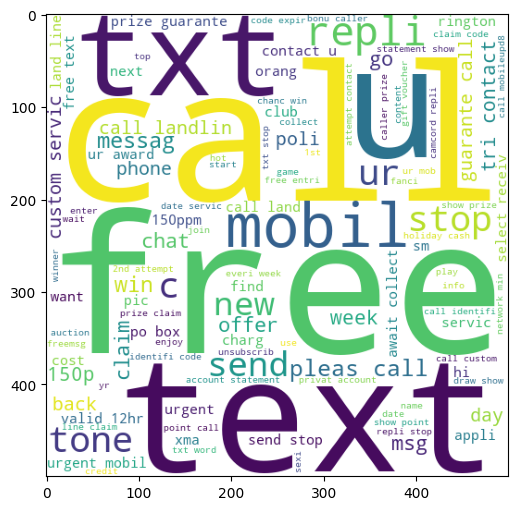

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

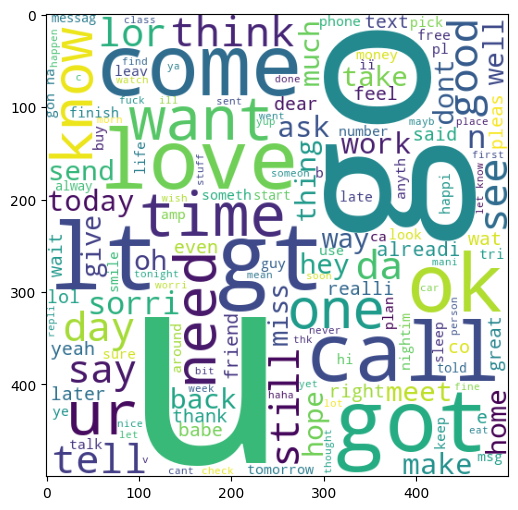

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [42]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

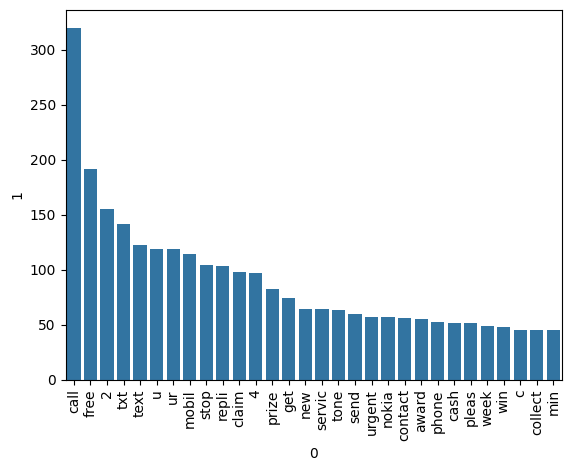

In [44]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=most_common_words[0], y=most_common_words[1])  # most occurring 30 words
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
len(ham_corpus)

35404

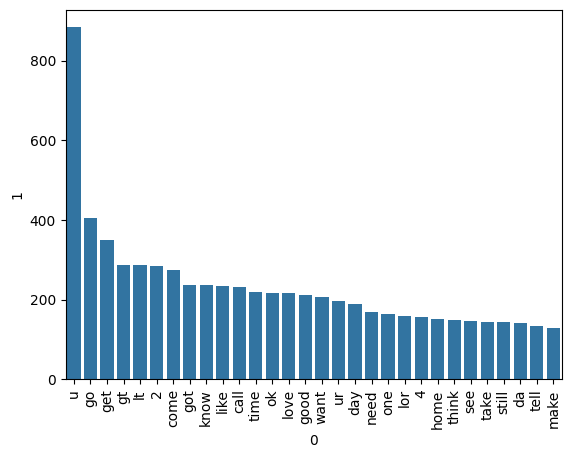

In [47]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=most_common_words[0], y=most_common_words[1])  # most occurring 30 words
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [149]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)

In [150]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [151]:
# Removing scaling because of loss in precision in NB
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x=scaler.fit_transform(x)

In [152]:
y=df['target'].values

In [153]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)    

In [156]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [157]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [158]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8413926499032882
[[743 142]
 [ 22 127]]
0.4721189591078067


In [159]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[885   0]
 [ 30 119]]
1.0


In [160]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[883   2]
 [ 19 130]]
0.9848484848484849


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [162]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [163]:
clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [164]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [165]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9769230769230769)

In [166]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9769230769230769
For KN
Accuracy -  0.9148936170212766
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9332688588007737
Precision -  0.8508771929824561
For LR
Accuracy -  0.9642166344294004
Precision -  0.9745762711864406
For RF
Accuracy -  0.9729206963249516
Precision -  1.0
For AdaBoost
Accuracy -  0.9168278529980658
Precision -  0.8539325842696629
For BgC
Accuracy -  0.9564796905222437
Precision -  0.8714285714285714
For ETC
Accuracy -  0.9758220502901354
Precision -  0.9769230769230769
For GBDT
Accuracy -  0.9555125725338491
Precision -  0.963963963963964


In [167]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [168]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
2,NB,0.970986,1.000000
5,RF,0.972921,1.000000
0,SVC,0.975822,0.976923
8,ETC,0.975822,0.976923
4,LR,0.964217,0.974576
9,GBDT,0.955513,0.963964
7,BgC,0.956480,0.871429
6,AdaBoost,0.916828,0.853933
3,DT,0.933269,0.850877


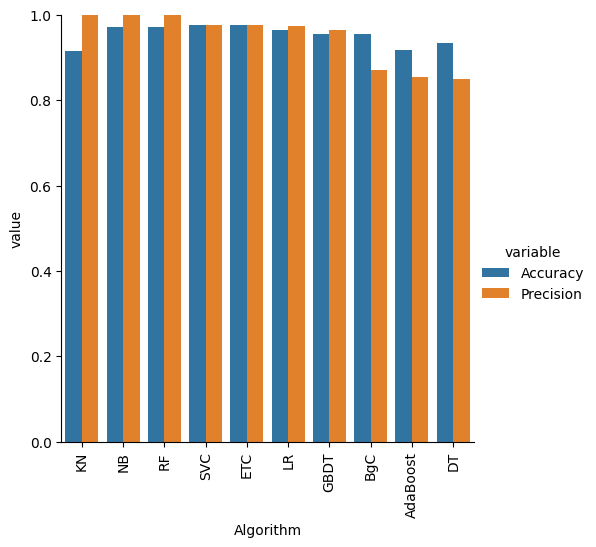

In [169]:
performance_df_melted = performance_df.melt(id_vars='Algorithm', var_name='variable', value_name='value')
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df_melted, kind='bar', height=5)
plt.ylim(0, 1.0)
plt.xticks(rotation='vertical')
plt.show()

#Model improvement
# 1. change the max_features parameter to TfIdf

In [170]:
temp_df=pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_2000':accuracy_scores, 'Precision_max_ft_2000':precision_scores}) 

In [171]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_2000,Precision_max_ft_2000
0,KN,0.914894,1.000000,0.914894,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.972921,1.000000,0.972921,1.000000
3,SVC,0.975822,0.976923,0.975822,0.976923
4,ETC,0.975822,0.976923,0.975822,0.976923
5,LR,0.964217,0.974576,0.964217,0.974576
6,GBDT,0.955513,0.963964,0.955513,0.963964
7,BgC,0.956480,0.871429,0.956480,0.871429
8,AdaBoost,0.916828,0.853933,0.916828,0.853933
9,DT,0.933269,0.850877,0.933269,0.850877


In [172]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))